In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import talib as ta # 기술적 분석 (보조지표)
%matplotlib inline

In [3]:
# 크롤링 start_date, end_date
#start_date=input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
#end_date=input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')
start_date = '2013-01-01'
end_date = '2021-01-18'

In [4]:
# 데이터 수집기간 입력
# yahoo finance 양식, ex) yyyy-mm-dd
#start_date = '2018-01-01'
#end_date = '2020-10-13'

# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]

In [27]:
# 주요 3개국 대비 원 환율

# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# NASDAQ
nasdaq_ = yf.download("^IXIC", start=start_date, end=end_date)
nasdaq_.columns = ['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Close','nasdaq_Adj Close','nasdaq_Volume']
nasdaq_ = nasdaq_.drop(['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Adj Close','nasdaq_Volume'], axis=1)

# Russell 2000
russell_2000_ = yf.download("^RUT", start=start_date, end=end_date)
russell_2000_.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000_ = russell_2000_.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)

# 삼성 차트 데이터
sam_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005930")
sam_.columns = ['Open','High','Low','Close','Volume']
model_samsung = sam_.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
macd, macdsignal9, macdhist = ta.MACD(model_samsung.Close, fastperiod=12, slowperiod=26, signalperiod=9)
#model_samsung['macd'] = macd
#model_samsung['macdsignal9'] = macdsignal9
#model_samsung['macdhist'] = macdhist

# 2) 볼린저밴드 (주가의 이동평균선을 중심으로 표준편차 범위를 표시)
ubb, mbb, lbb = ta.BBANDS(model_samsung.Close, 20, 2)
#model_samsung['ubb'] = ubb
#model_samsung['mbb'] = mbb
#model_samsung['lbb'] = lbb

# 1) 이평선(SMA, EMA, WMA) (w = 5,10,15,20,30,60,120)
#model_samsung['ma_5'] = ta.SMA(model_samsung.Close, timeperiod=5)
#model_samsung['ma_10'] = ta.SMA(model_samsung.Close, timeperiod=10)
#model_samsung['ma_15'] = ta.SMA(model_samsung.Close, timeperiod=15)
#model_samsung['ma_20'] = ta.SMA(model_samsung.Close, timeperiod=20)
#model_samsung['ma_30'] = ta.SMA(model_samsung.Close, timeperiod=30)
#model_samsung['ma_60'] = ta.SMA(model_samsung.Close, timeperiod=60)
#model_samsung['ma_120'] = ta.SMA(model_samsung.Close, timeperiod=120)

MSCI_KR = fdr.DataReader('156080', start_date,end_date) #MSCI KOREA
MSCI_KR = MSCI_KR.drop(['Open','High','Low', 'Change','Volume'], axis=1) 
MSCI_KR.columns = ['MSCI_KR']

# SOX 지수
SOX = yf.download("^SOX", start=start_date, end=end_date)
SOX.columns = ['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Close','SOXX_Adj Close','SOXX_Volume']
SOX = SOX.drop(['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Adj Close','SOXX_Volume'], axis=1)

# 미국 국채 수익률 (5년)
treasury_5y_ = yf.download("^FVX", start=start_date, end=end_date)
treasury_5y_.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y_ = treasury_5y_.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:
model_samsung['exchange_rate_usd'] = exchange_rate_usd_
model_samsung['nasdaq'] = nasdaq_
model_samsung['russell_2000'] = russell_2000_
model_samsung['MSCI_KR'] = MSCI_KR
model_samsung['SOX'] = SOX
model_samsung['treasury_5y'] = treasury_5y_

In [29]:
model_samsung = model_samsung.dropna() # 결측치가 있는 행 제거
model_samsung

,Open,High,Low,Close,Volume,exchange_rate_usd,nasdaq,russell_2000,MSCI_KR,SOX,treasury_5y
날짜,,,,,,,,,,,
2013-01-02,30660,31519,30540,31520,229274,1063.50,3112.260010,873.419983,10767,399.730011,0.763
2013-01-03,31640,31680,30860,30860,284927,1063.20,3100.570068,872.599976,10771,397.540009,0.808
2013-01-04,30800,30840,30199,30500,260120,1062.39,3101.659912,879.150024,10650,397.679993,0.819
2013-01-07,30300,30560,29999,30400,252436,1063.21,3098.810059,875.799988,10636,395.779999,0.813
2013-01-08,30260,30340,29960,30000,276757,1064.15,3091.810059,874.700012,10617,391.359985,0.785
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,90000,96800,89500,91000,90306177,1097.23,13036.429688,2091.010010,21055,2969.919922,0.498
2021-01-12,90300,91400,87800,90600,48682416,1094.48,13072.429688,2127.959961,20870,2988.020020,0.503
2021-01-13,89800,91200,89100,89700,36068848,1097.12,13128.950195,2111.969971,21075,2991.949951,0.476


In [30]:
model_samsung.corr()

,Open,High,Low,Close,Volume,exchange_rate_usd,nasdaq,russell_2000,MSCI_KR,SOX,treasury_5y
Open,1.000000,0.999416,0.999582,0.985163,0.674843,0.262020,0.897367,0.852297,0.944527,0.923891,-0.022316
High,0.999416,1.000000,0.999429,0.985850,0.681550,0.262387,0.897685,0.852167,0.945022,0.924434,-0.024326
Low,0.999582,0.999429,1.000000,0.985753,0.670460,0.261792,0.897678,0.853977,0.945441,0.924199,-0.021552
Close,0.985163,0.985850,0.985753,1.000000,0.675377,0.257127,0.905780,0.864896,0.960608,0.932419,-0.010901
Volume,0.674843,0.681550,0.670460,0.675377,1.000000,0.386229,0.758140,0.539797,0.573506,0.765032,-0.256135
exchange_rate_usd,0.262020,0.262387,0.261792,0.257127,0.386229,1.000000,0.396401,0.171662,0.055833,0.372255,-0.264178
nasdaq,0.897367,0.897685,0.897678,0.905780,0.758140,0.396401,1.000000,0.869755,0.858272,0.992872,-0.105420
russell_2000,0.852297,0.852167,0.853977,0.864896,0.539797,0.171662,0.869755,1.000000,0.879696,0.859209,0.321116
MSCI_KR,0.944527,0.945022,0.945441,0.960608,0.573506,0.055833,0.858272,0.879696,1.000000,0.881020,0.082705
SOX,0.923891,0.924434,0.924199,0.932419,0.765032,0.372255,0.992872,0.859209,0.881020,1.000000,-0.137614


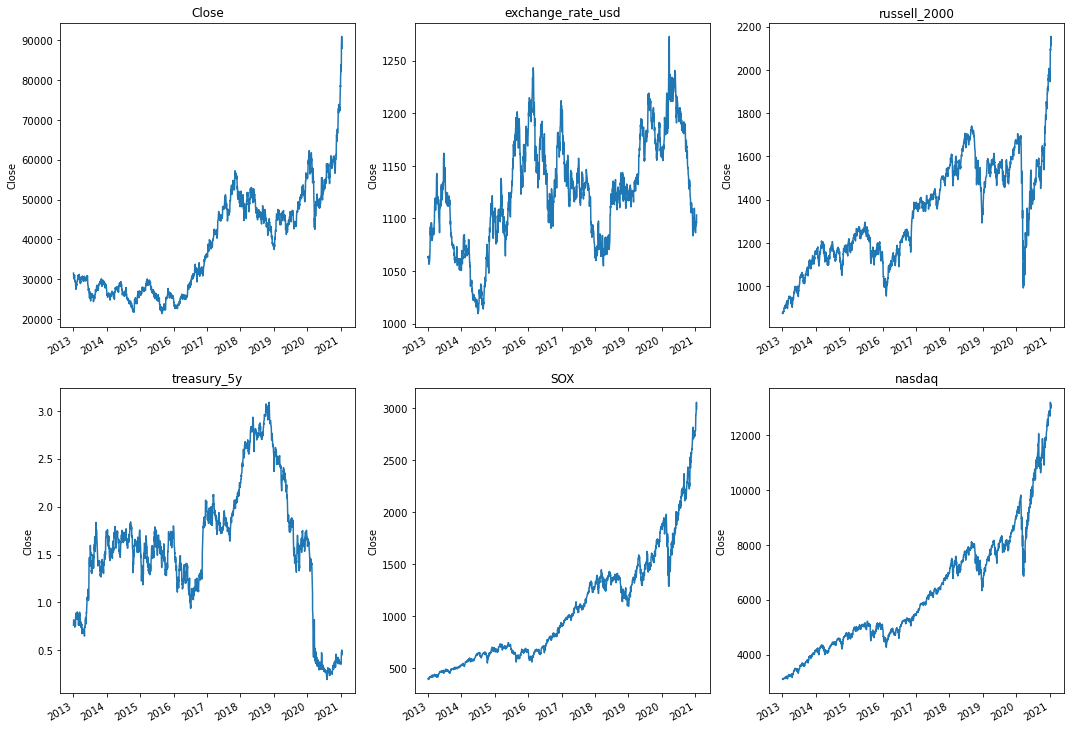

In [32]:
# Let's see a historical view of the closing price
index2 = ['Close', 'exchange_rate_usd', 'russell_2000','treasury_5y', 'SOX', 'nasdaq']
plt.figure(figsize=(18, 8))
plt.subplots_adjust(top=2.0, bottom=1.2)

for i, company in enumerate(index2, 1):
    plt.subplot(3, 3, i)
    model_samsung[company].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(company)

In [36]:
click_sam = pd.read_excel('click_samsung.xlsx')
click_sam = click_sam.set_index('index')
click_sam

In [40]:
click_sam = click_sam['2020-03':]

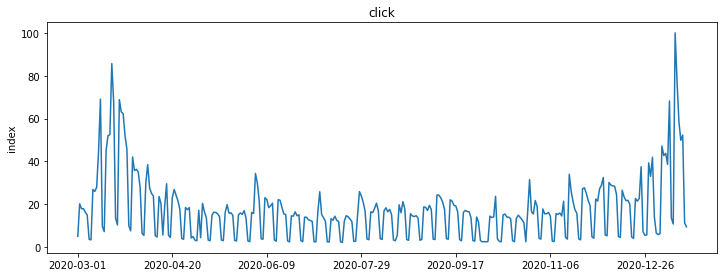

In [41]:
# Let's see a historical view of the closing price
index2 = ['click']
plt.figure(figsize=(12, 4))
plt.subplots_adjust(top=2.0, bottom=1.2)

for i, company in enumerate(index2, 1):
    plt.subplot(1, 1, i)
    click_sam[company].plot()
    plt.ylabel('index')
    plt.xlabel(None)
    plt.title(company)

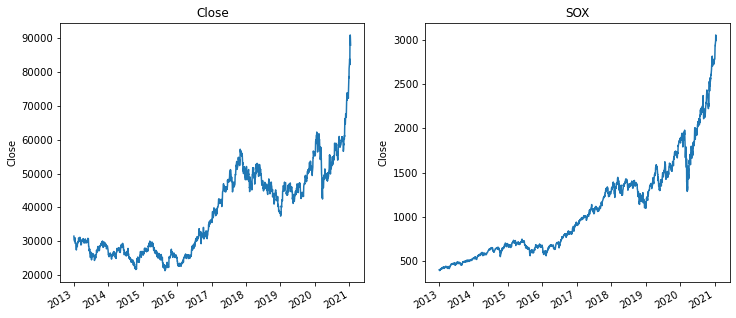

In [33]:
# Let's see a historical view of the closing price
index2 = ['Close', 'SOX']
plt.figure(figsize=(12, 2))
plt.subplots_adjust(top=2.0, bottom=1.2)

for i, company in enumerate(index2, 1):
    plt.subplot(1, 2, i)
    model_samsung[company].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(company)

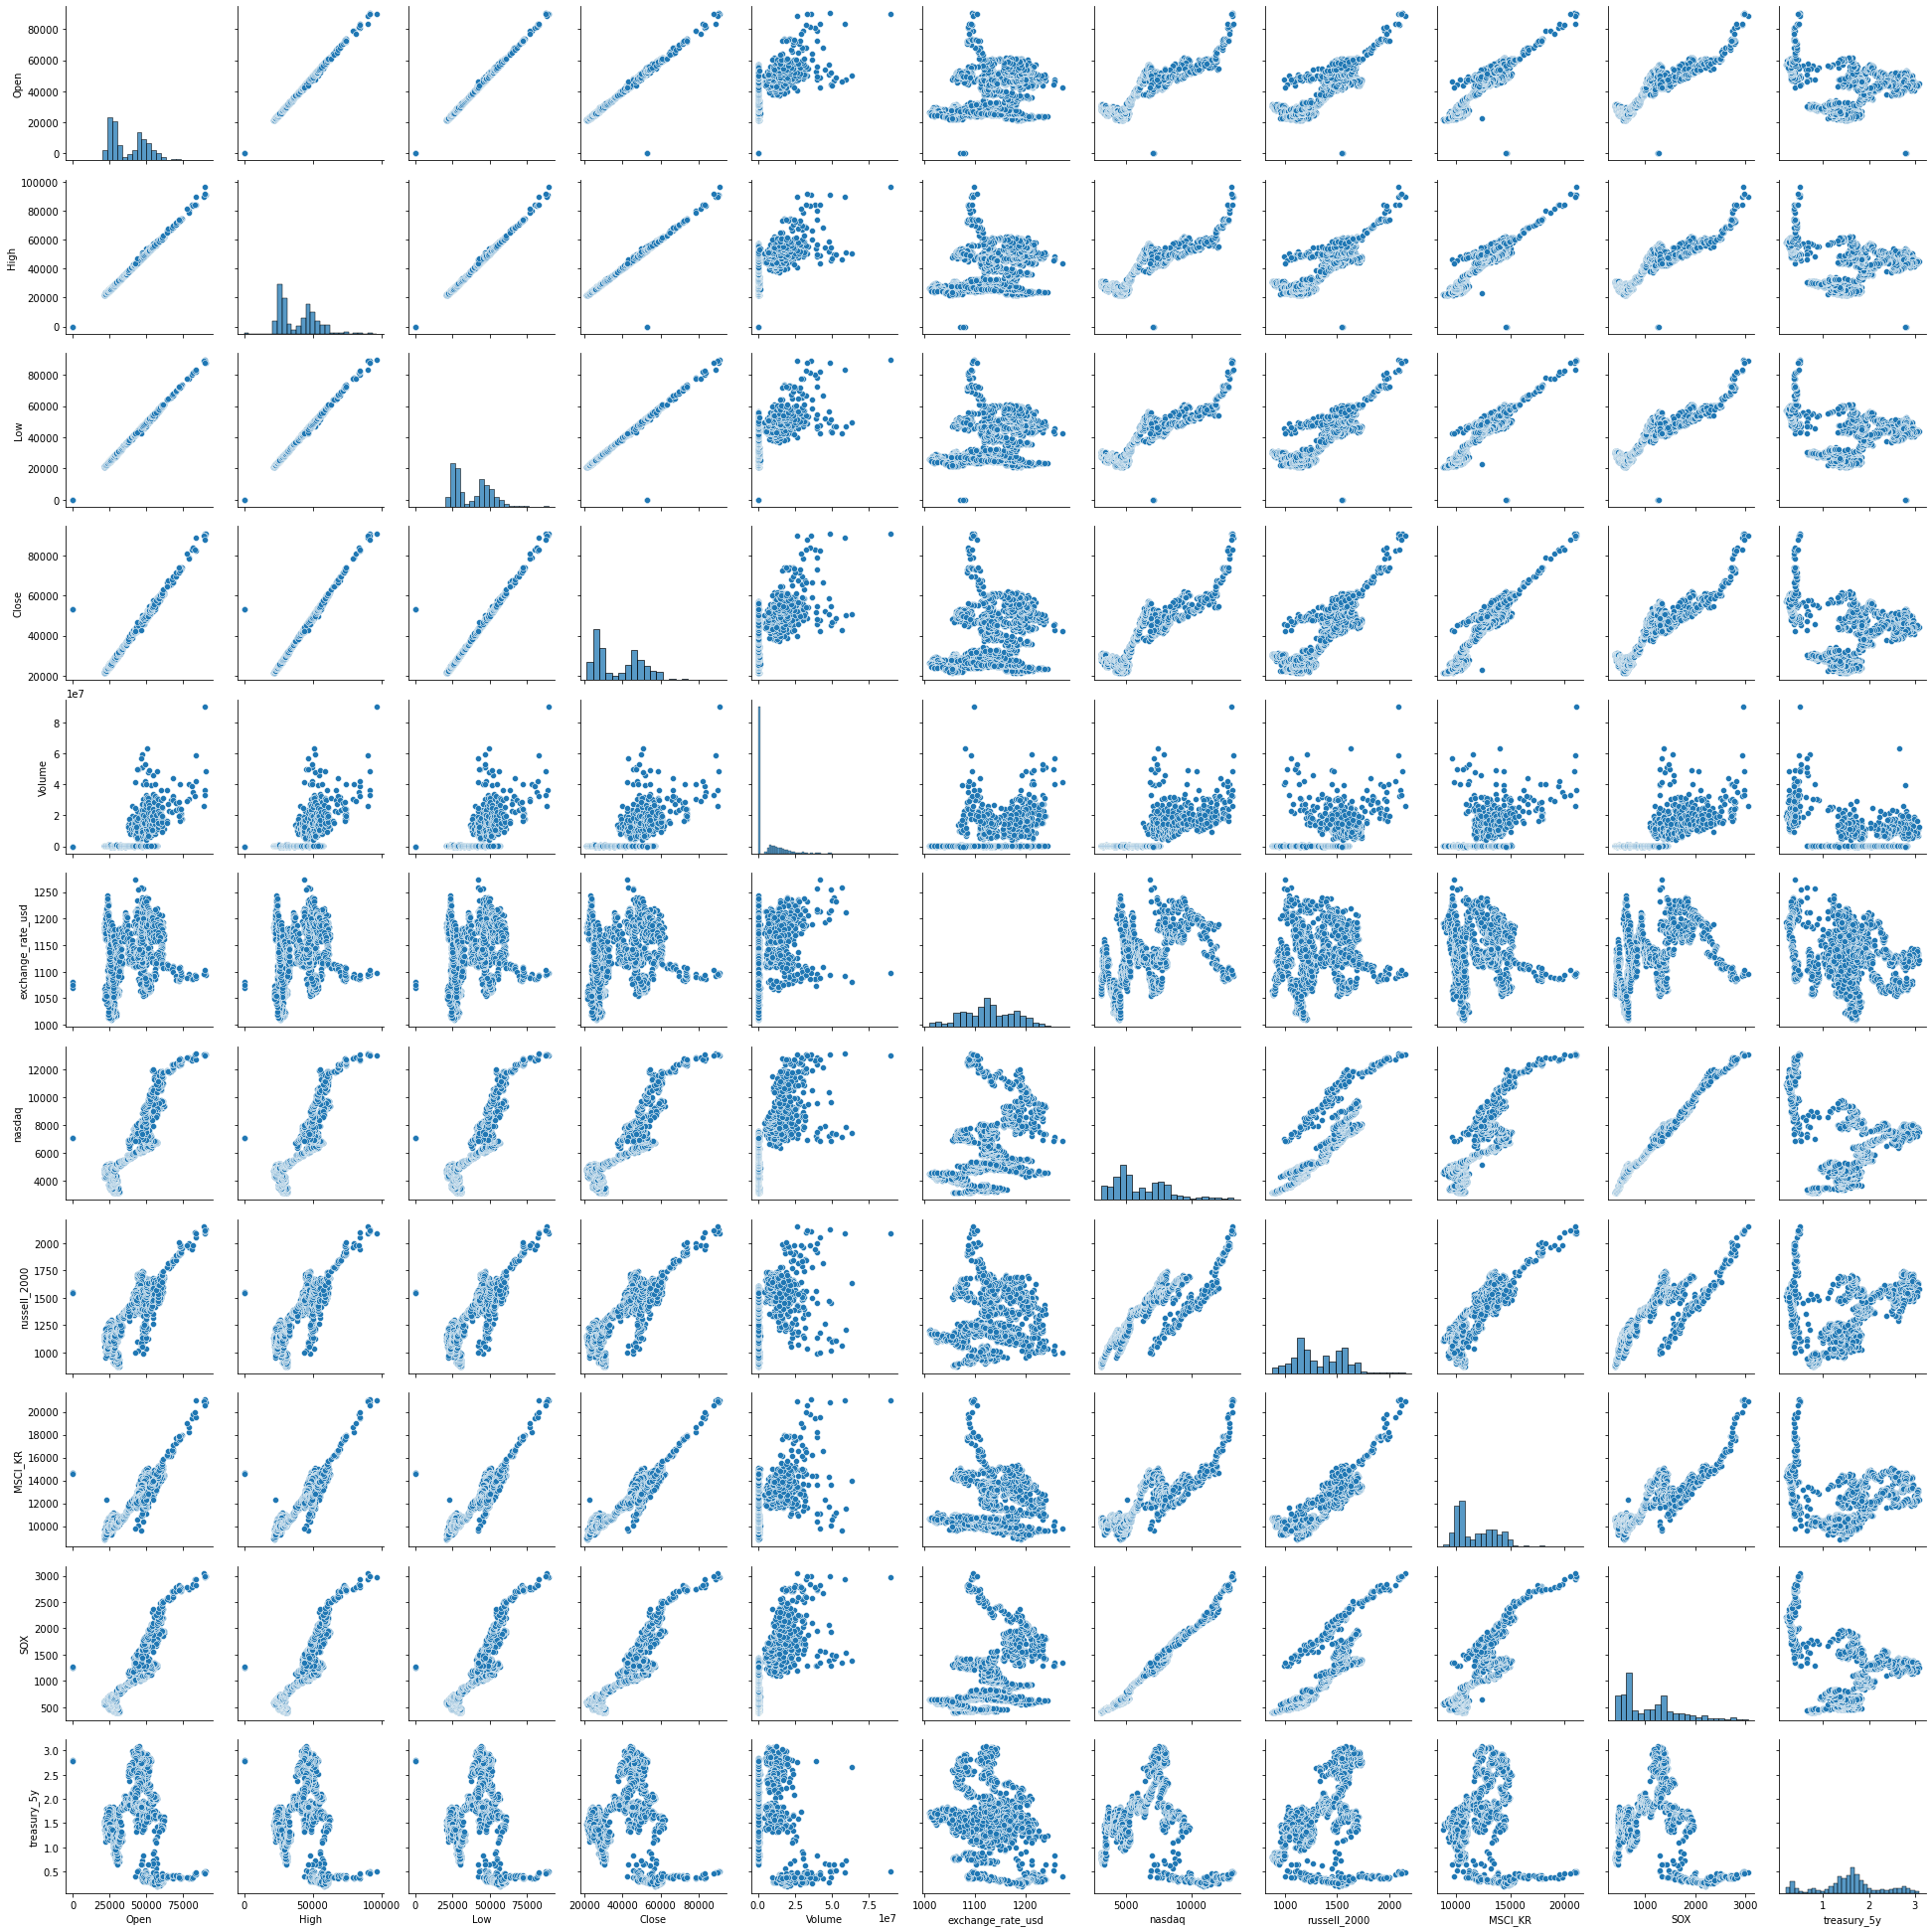

In [34]:
import seaborn as sns
sns.pairplot(model_samsung[1:]) ## pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도 첫번째 행은 null 값이므로 제외하고 수행